# Filip Stanojković
### First ever elaborate project for a university exam.
### Very entry-level, with a high mistake possibility.

# Loading and cleaning data for further analysis.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "C:\\Users\walid\\OneDrive\\Desktop\\aidams\stats\\GlobalLandTemperaturesByCountry.csv"
data = pd.read_csv(file_path)

# Display the first few rows and basic information about the dataset
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


(           dt  AverageTemperature  AverageTemperatureUncertainty Country
 0  1743-11-01               4.384                          2.294   Åland
 1  1743-12-01                 NaN                            NaN   Åland
 2  1744-01-01                 NaN                            NaN   Åland
 3  1744-02-01                 NaN                            NaN   Åland
 4  1744-03-01                 NaN                            NaN   Åland,
 None,
        AverageTemperature  AverageTemperatureUncertainty
 count       544811.000000                  545550.000000
 mean            17.193354                       1.019057
 std             10.953966                       1.201930
 min            -37.658000                       0.052000
 25%             10.025000                       0.323000
 50%             20.901000                       0.571000
 75%             25.814000                       1.206000
 max             38.842000                      15.003000)

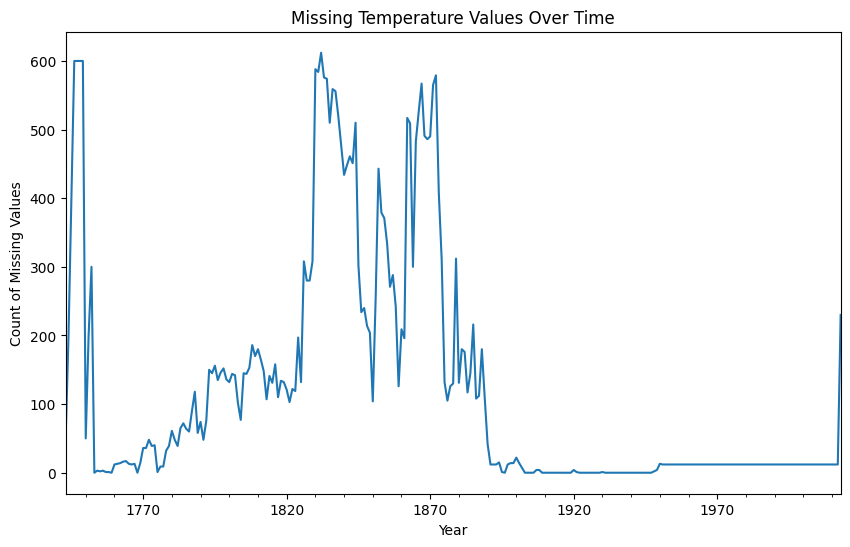

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [46]:
# Convert 'dt' column to datetime format
data['dt'] = pd.to_datetime(data['dt'])

# Check for missing values
missing_values = data.isnull().sum()

# Plot missing values over time
fig, ax = plt.subplots(figsize=(10, 6))
data.set_index('dt')['AverageTemperature'].isnull().resample('YE').sum().plot(ax=ax)
ax.set_title('Missing Temperature Values Over Time')
ax.set_ylabel('Count of Missing Values')
ax.set_xlabel('Year')
plt.show()  

missing_values

In [47]:
# Filter out data prior to 1850 due to sparsity and inaccuracy
data_filtered = data[data['dt'].dt.year >= 1850]

# Check the missing data count after filtering
data_filtered.head(), data_filtered.isnull().sum()

(             dt  AverageTemperature  AverageTemperatureUncertainty Country
 1274 1850-01-01              -9.083                          1.834   Åland
 1275 1850-02-01              -2.309                          1.603   Åland
 1276 1850-03-01              -4.801                          3.033   Åland
 1277 1850-04-01               1.242                          2.008   Åland
 1278 1850-05-01               7.920                          0.881   Åland,
 dt                                   0
 AverageTemperature               12912
 AverageTemperatureUncertainty    12173
 Country                              0
 dtype: int64)

In [48]:
# Applying linear interpolation using .loc to ensure changes are properly registered
data_filtered.loc[:, 'AverageTemperature'] = data_filtered['AverageTemperature'].interpolate(method='linear')
data_filtered.loc[:, 'AverageTemperatureUncertainty'] = data_filtered['AverageTemperatureUncertainty'].interpolate(method='linear')

# Recheck the dataset to ensure the operation was successful
data_filtered.isnull().sum(), data_filtered.head()

(dt                               0
 AverageTemperature               0
 AverageTemperatureUncertainty    0
 Country                          0
 dtype: int64,
              dt  AverageTemperature  AverageTemperatureUncertainty Country
 1274 1850-01-01              -9.083                          1.834   Åland
 1275 1850-02-01              -2.309                          1.603   Åland
 1276 1850-03-01              -4.801                          3.033   Åland
 1277 1850-04-01               1.242                          2.008   Åland
 1278 1850-05-01               7.920                          0.881   Åland)

In [49]:
print(data_filtered)

               dt  AverageTemperature  AverageTemperatureUncertainty   Country
1274   1850-01-01              -9.083                          1.834     Åland
1275   1850-02-01              -2.309                          1.603     Åland
1276   1850-03-01              -4.801                          3.033     Åland
1277   1850-04-01               1.242                          2.008     Åland
1278   1850-05-01               7.920                          0.881     Åland
...           ...                 ...                            ...       ...
577457 2013-05-01              19.059                          1.022  Zimbabwe
577458 2013-06-01              17.613                          0.473  Zimbabwe
577459 2013-07-01              17.000                          0.453  Zimbabwe
577460 2013-08-01              19.759                          0.717  Zimbabwe
577461 2013-09-01              19.759                          0.717  Zimbabwe

[465370 rows x 4 columns]


# Exploratory Data Analysis (EDA)

### Visualising temperature trends globally and country-specific over time.

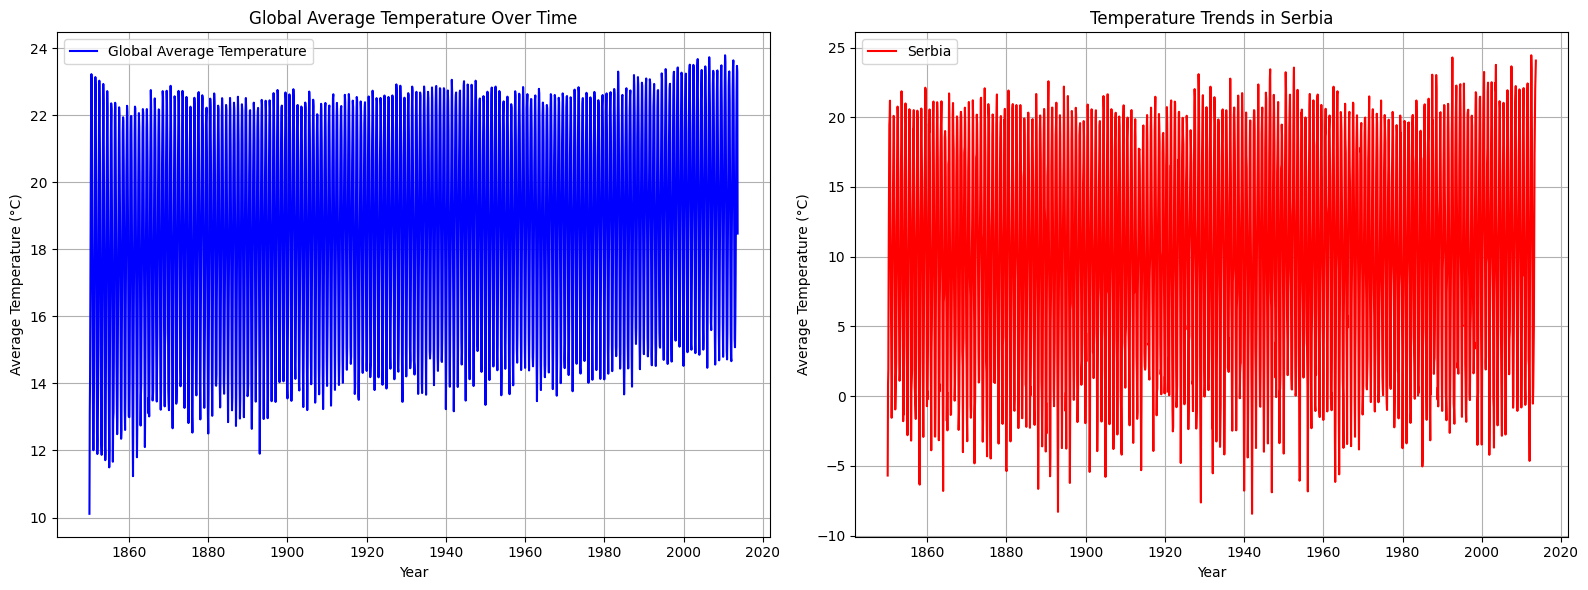

In [50]:
# Calculate Global Average Temperature per month
global_avg_temp = data_filtered.groupby('dt')['AverageTemperature'].mean()
# Filter data for Serbia
serbia_avg_temp = data_filtered[data_filtered['Country'] == 'Serbia'].groupby('dt')['AverageTemperature'].mean()

# Setting up the plots side-by-side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Global Average Temperature
ax[0].plot(global_avg_temp.index, global_avg_temp, label='Global Average Temperature', color='blue')
ax[0].set_title('Global Average Temperature Over Time')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Average Temperature (°C)')
ax[0].legend()
ax[0].grid(True)

# Plot for Serbia Temperature Trends
ax[1].plot(serbia_avg_temp.index, serbia_avg_temp, label='Serbia', color='red')
ax[1].set_title('Temperature Trends in Serbia')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Average Temperature (°C)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()



In [51]:
data_filtered.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
1274,1850-01-01,-9.083,1.834,Åland
1275,1850-02-01,-2.309,1.603,Åland
1276,1850-03-01,-4.801,3.033,Åland
1277,1850-04-01,1.242,2.008,Åland
1278,1850-05-01,7.920,0.881,Åland


# Statistical analysis

### Calculating means, medians, variances, and other descriptive statistics for temperatures over time.

In [52]:
global_stats = global_avg_temp.describe()
print("Global Temperature Descriptive Statistics:")
print(global_stats)

Global Temperature Descriptive Statistics:
count    1965.000000
mean       18.566700
std         3.199223
min        10.111119
25%        15.523396
50%        18.872338
75%        21.612052
max        23.790383
Name: AverageTemperature, dtype: float64


In [53]:
serbia_stats = serbia_avg_temp.describe()
print("Serbia Temperature Descriptive Statistics:")
print(serbia_stats)

Serbia Temperature Descriptive Statistics:
count    1965.000000
mean       10.092554
std         8.008147
min        -8.432000
25%         2.743000
50%        10.466000
75%        17.483000
max        24.445000
Name: AverageTemperature, dtype: float64


### Null Hypothesis (H0): There is no significant difference in the mean temperatures across the specified decades.

In [54]:
# Suppress the SettingWithCopyWarning for the next operation
pd.options.mode.chained_assignment = None

# Creating a new column 'decade' for the decade-wise segregation
data_filtered.loc[:, 'decade'] = (data_filtered['dt'].dt.year // 10) * 10

# Perform one-way ANOVA
f_value, p_value = stats.f_oneway(
    data_filtered[data_filtered['decade'] == 1850]['AverageTemperature'],
    data_filtered[data_filtered['decade'] == 1900]['AverageTemperature'],
    data_filtered[data_filtered['decade'] == 1950]['AverageTemperature'],
    data_filtered[data_filtered['decade'] == 2000]['AverageTemperature'],
    data_filtered[data_filtered['decade'] == 2010]['AverageTemperature'],
)

# Re-enable the SettingWithCopyWarning for subsequent operations
pd.options.mode.chained_assignment = 'warn'

print("ANOVA test results:")
print(f"F-Statistic: {f_value}, P-value: {p_value}")

ANOVA test results:
F-Statistic: 161.7771664801123, P-value: 2.296476500723979e-138


F-Statistic: A value of 161.77 suggests that there is a significant difference in means between the groups (decades). \
P-Value: The p-value is extremely low (2.29e-138), indicating that the observed difference in means is highly statistically significant. \
Since the p-value is much less than the common alpha level of 0.05 (or even 0.01), we reject the null hypothesis that all group means are the same. \
However, I will check K-S and Levene's test to conclude if ANOVA assumptions are violated.

In [55]:
# Check homogeneity of variance
decade_groups = [data_filtered[data_filtered['decade'] == decade]['AverageTemperature'] for decade in data_filtered['decade'].unique()]
stat, p = stats.levene(*decade_groups)
print(f"Levene’s Test: Stat={stat}, p-value={p}")

Levene’s Test: Stat=5.45086563500938, p-value=8.1532350038526e-12


In the context of hypothesis testing, the null hypothesis states that there are no differences between group means. Despite the significant F-statistic and p-value from the ANOVA, which would typically lead us to reject the null hypothesis and conclude that there are indeed differences between the decade temperature means, the violations of ANOVA assumptions mean we should be cautious with this conclusion.

We can now confidently reject the null hypothesis.

# Regression analysis

### Linear regression model for global average temperatures over time.

In [56]:
# Prepare the data
X = np.array(data_filtered['dt'].dt.year).reshape(-1, 1)  # Reshape for sklearn
y = data_filtered['AverageTemperature'].values

# Create and fit the model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Print the coefficients
print(f"Coefficient: {linear_model.coef_[0]}")
print(f"Intercept: {linear_model.intercept_}")

Coefficient: 0.01066151909507486
Intercept: -2.021191681635319


Coefficient: 0.01066. \
This value represents the estimated change in average temperature (in degrees Celsius) for each additional year.

Intercept: -2.021. \
This is the point where the regression line intercepts the y-axis of the graph. In terms of the model, it represents the predicted value of the dependent variable (in this case, average temperature) when all independent variables (in this case, time as the year) are set to zero.

The positive coefficient suggests a long-term trend of rising temperatures, which is consistent with what is generally understood about global warming. For each year, the model predicts an increase in the global average temperature of about 0.01066°C.

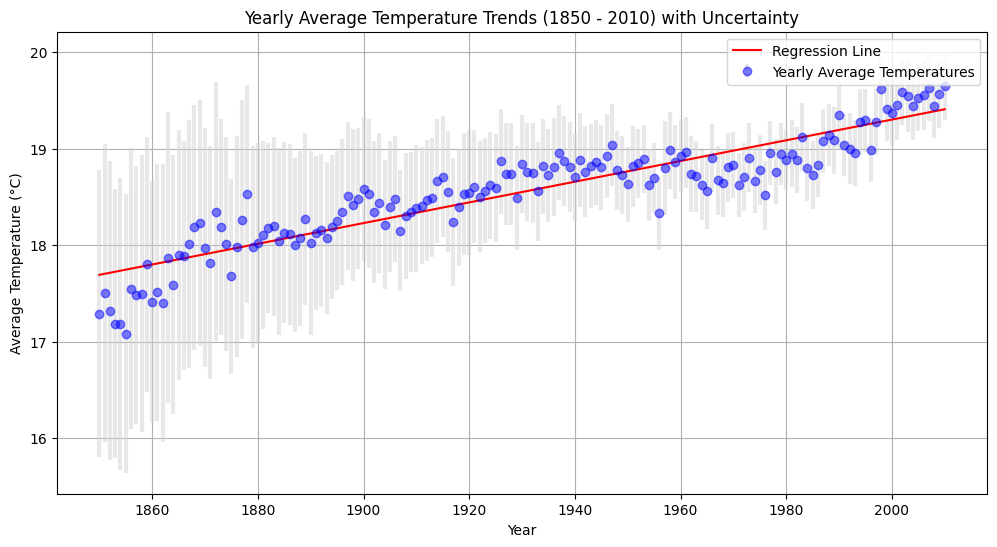

In [57]:
# Filter data within the year range and ensure no NaN values in 'AverageTemperature' and 'AverageTemperatureUncertainty'
data_reg = data_filtered[(data_filtered['dt'].dt.year >= 1850) & (data_filtered['dt'].dt.year <= 2010)]
data_reg = data_reg.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])

# Calculate yearly averages and uncertainty
yearly_data = data_reg.groupby(data_reg['dt'].dt.year).agg({
    'AverageTemperature': 'mean',
    'AverageTemperatureUncertainty': 'mean'
}).reset_index()
yearly_data.rename(columns={'dt': 'Year', 'AverageTemperature': 'YearlyAverageTemp', 'AverageTemperatureUncertainty': 'YearlyUncertainty'}, inplace=True)

# Prepare the data for regression
X = yearly_data['Year'].values.reshape(-1, 1)
y = yearly_data['YearlyAverageTemp'].values

# Create and fit the model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Generate predictions for the plot
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_plot = linear_model.predict(X_plot)

# Plotting
plt.figure(figsize=(12, 6))
plt.errorbar(X, y, yerr=yearly_data['YearlyUncertainty'].values, fmt='o', color='blue', label='Yearly Average Temperatures', alpha=0.5, ecolor='lightgray', elinewidth=3, capsize=0)
plt.plot(X_plot, y_plot, color='red', label='Regression Line')
plt.title('Yearly Average Temperature Trends (1850 - 2010) with Uncertainty')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Decision Tree and Random Forest 

In [59]:
from sklearn.model_selection import train_test_split


#data_filtered = data_filtered.sample(frac=0.1, random_state=42)
# Convert 'dt' to datetime
data_filtered['dt'] = pd.to_datetime(data_filtered['dt'])

# Extract year and month from 'dt'
data_filtered['year'] = data_filtered['dt'].dt.year
data_filtered['month'] = data_filtered['dt'].dt.month

# Define features and target variable
X = data_filtered[['AverageTemperatureUncertainty', 'Country', 'decade', 'year', 'month']]
y = data_filtered['AverageTemperature']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\walid\AppData\Local\Temp\ipykernel_29352\1466465445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['dt'] = pd.to_datetime(data_filtered['dt'])
C:\Users\walid\AppData\Local\Temp\ipykernel_29352\1466465445.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['year'] = data_filtered['dt'].dt.year
C:\Users\walid\AppData\Local\Temp\ipykernel_29352\1466465445.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [60]:
emission_data = "C:\\Users\\walid\\OneDrive\\Desktop\\aidams\\stats\\Emissiondata.csv"
ghg_data_emition_data = pd.read_csv(emission_data)
ghg_data_emition_data.head()

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
1,Africa,0,0,0,0,0,0,0,0,0,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
2,Albania,0,0,0,0,0,0,0,0,0,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
3,Algeria,0,0,0,0,0,0,0,0,0,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
4,Americas (other),0,0,0,0,0,0,0,0,0,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10


In [61]:
# Convert emissions data to long format
df_emissions_long = ghg_data_emition_data.melt(id_vars=['Country'], var_name='year', value_name='emissions')
df_emissions_long['year'] = df_emissions_long['year'].astype(int)

# Merge datasets on Country and Year
merged_df = pd.merge(data_filtered, df_emissions_long, on=['Country', 'year'], how='left')

In [62]:
merged_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,decade,year,month,emissions
0,1850-01-01,-9.083,1.834,Åland,1850,1850,1,NaN
1,1850-02-01,-2.309,1.603,Åland,1850,1850,2,NaN
2,1850-03-01,-4.801,3.033,Åland,1850,1850,3,NaN
3,1850-04-01,1.242,2.008,Åland,1850,1850,4,NaN
4,1850-05-01,7.920,0.881,Åland,1850,1850,5,NaN


In [63]:
merged_df = merged_df.sample(frac=0.1, random_state=42)

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Handle missing values in 'emissions' by imputing the mean
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['emissions']),
    ], remainder='passthrough'
)

# Split the data into features and target
X = merged_df[['year', 'month', 'emissions']]
y = merged_df['AverageTemperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train models and evaluate
results = {}
for name, model in models.items():
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f"{name}: MSE = {mse:.4f}")



Decision Tree: MSE = 124.7382
Random Forest: MSE = 98.3820


In [65]:
# Select the best model based on MSE
best_model_name = min(results, key=results.get)
best_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', models[best_model_name])])
best_model_pipeline.fit(X_train, y_train)
print(f"The best model is {best_model_name} with an MSE of {results[best_model_name]:.4f}")

The best model is Random Forest with an MSE of 98.3820


In [66]:
# Predicting a new temperature
new_data = pd.DataFrame({
    'year': [1851],   # New year for prediction
    'month': [6],     # New month for prediction
    'emissions': [1500]  # Emissions value for the new data point
})

predicted_temp = best_model_pipeline.predict(new_data)
print(f"Predicted temperature for new data: {predicted_temp[0]:.4f}")

Predicted temperature for new data: 24.7201
